In [1]:
# Exercise 1: Identifying and Handling Missing Data
import pandas as pd
import numpy as np

# Sample dataset with missing values
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', None],
    'Age': [24, 30, None, 22, 35],
    'Salary': [48000, None, 57000, None, 60000]
}
df = pd.DataFrame(data)
# Filling missing values and dropping rows
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Salary'].fillna(df['Salary'].median(), inplace=True)
df.dropna(subset=['Name'], inplace=True)
print('After cleaning:\n', df)

After cleaning:
       Name    Age   Salary
0    Alice  24.00  48000.0
1      Bob  30.00  57000.0
2  Charlie  27.75  57000.0
3    David  22.00  57000.0


/tmp/ipykernel_5537/1094342078.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipykernel_5537/1094342078.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [2]:
data = {
    'Product': ['Laptop', 'Laptop', 'Desktop', 'Tablet', 'Tablet'],
    'Category': ['Electronics', 'electronics', 'Electronics', 'Gadgets', 'gadgets']
}
df = pd.DataFrame(data)

# Standardize category values
df['Category'] = df['Category'].str.capitalize()
print('Standardized Data:\n', df)

Standardized Data:
    Product     Category
0   Laptop  Electronics
1   Laptop  Electronics
2  Desktop  Electronics
3   Tablet      Gadgets
4   Tablet      Gadgets


In [5]:
pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 7.9 MB/s eta 0:00:008.4 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 8.0 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn]0m 3/4 [scikit-learn]
Note: you may need to restart the kernel to use updated packages.


In [3]:
# 1. Load Dataset
df_games = pd.read_csv('/home/asyrof/Downloads/games.csv')

# Menampilkan info dasar
print("--- Info Dataset ---")
print(df_games.info())

# 2. Identifikasi Missing Values
print("\n--- Jumlah Missing Values per Kolom ---")
missing_values = df_games.isnull().sum()
print(missing_values[missing_values > 0]) # Hanya menampilkan yang ada missing value-nya
# (Opsional) Strategi Pembersihan Sederhana untuk lanjut ke tahap berikutnya
# Misal: Menghapus baris yang rating-nya kosong (jika ada)
df_games.dropna(subset=['rating'], inplace=True)

--- Info Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50872 non-null  int64  
 1   title           50872 non-null  object 
 2   date_release    50872 non-null  object 
 3   win             50872 non-null  bool   
 4   mac             50872 non-null  bool   
 5   linux           50872 non-null  bool   
 6   rating          50872 non-null  object 
 7   positive_ratio  50872 non-null  int64  
 8   user_reviews    50872 non-null  int64  
 9   price_final     50872 non-null  float64
 10  price_original  50872 non-null  float64
 11  discount        50872 non-null  float64
 12  steam_deck      50872 non-null  bool   
dtypes: bool(4), float64(3), int64(3), object(3)
memory usage: 3.7+ MB
None

--- Jumlah Missing Values per Kolom ---
Series([], dtype: int64)


In [4]:
from sklearn.preprocessing import MinMaxScaler

# Memilih kolom numerik untuk dinormalisasi
cols_to_normalize = ['price_final', 'user_reviews', 'positive_ratio']
# Inisialisasi Scaler
scaler = MinMaxScaler()

# Melakukan transformasi
# Kita buat kolom baru agar data asli tidak hilang
for col in cols_to_normalize:
    df_games[f'{col}_norm'] = scaler.fit_transform(df_games[[col]])
print("\n--- Hasil Normalisasi (Head) ---")
print(df_games[['title', 'price_final', 'price_final_norm', 'user_reviews', 'user_reviews_norm']].head())


--- Hasil Normalisasi (Head) ---
                               title  price_final  price_final_norm  \
0  Prince of Persia: Warrior Within™         9.99          0.033301   
1            BRINK: Agents of Change         2.99          0.009967   
2       Monaco: What's Yours Is Mine        14.99          0.049968   
3                 Escape Dead Island        14.99          0.049968   
4            Dungeon of the ENDLESS™        11.99          0.039968   

   user_reviews  user_reviews_norm  
0          2199           0.000292  
1            21           0.000001  
2          3722           0.000495  
3           873           0.000115  
4          8784           0.001171  


In [5]:
# 1. Standardisasi Kolom Kategori 'rating'
print("\n--- Rating Sebelum Standardisasi (Unik) ---")
print(df_games['rating'].unique())

# Mengubah menjadi huruf besar (UPPERCASE) dan menghapus spasi di awal/akhir
df_games['rating'] = df_games['rating'].str.upper().str.strip()
print("\n--- Rating Setelah Standardisasi (Unik) ---")
print(df_games['rating'].unique())

# 2. Menghapus Duplikat
initial_count = len(df_games)
# Menghapus duplikat berdasarkan 'app_id' (ID unik game)
df_games.drop_duplicates(subset=['app_id'], keep='first', inplace=True)
final_count = len(df_games)
print(f"\nData awal: {initial_count}, Data setelah deduplikasi: {final_count}")
print(f"Jumlah data duplikat yang dihapus: {initial_count - final_count}")


--- Rating Sebelum Standardisasi (Unik) ---
['Very Positive' 'Positive' 'Mixed' 'Mostly Positive'
 'Overwhelmingly Positive' 'Negative' 'Mostly Negative'
 'Overwhelmingly Negative' 'Very Negative']

--- Rating Setelah Standardisasi (Unik) ---
['VERY POSITIVE' 'POSITIVE' 'MIXED' 'MOSTLY POSITIVE'
 'OVERWHELMINGLY POSITIVE' 'NEGATIVE' 'MOSTLY NEGATIVE'
 'OVERWHELMINGLY NEGATIVE' 'VERY NEGATIVE']

Data awal: 50872, Data setelah deduplikasi: 50872
Jumlah data duplikat yang dihapus: 0


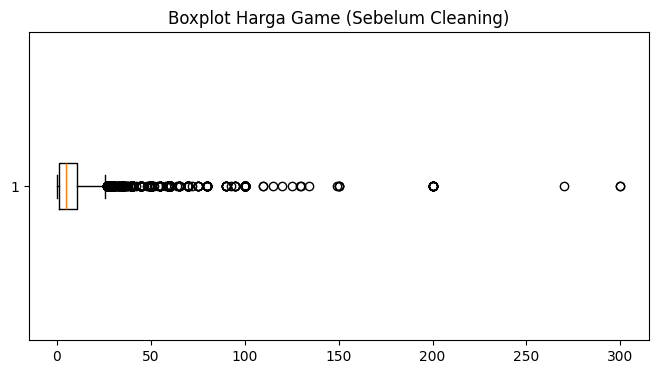

Batas Bawah: -14.01, Batas Atas: 25.990000000000002
Jumlah outlier harga yang dihapus: 2714
Total data bersih: 48158

--- Statistik Harga Sebelum vs Sesudah ---
Mean (Awal): 8.62
Mean (Bersih): 6.68


In [6]:
import matplotlib.pyplot as plt

# Kita fokus pada kolom 'price_final'
# Visualisasi Boxplot sebelum cleaning untuk melihat outlier
plt.figure(figsize=(8, 4))
plt.boxplot(df_games['price_final'], vert=False)
plt.title('Boxplot Harga Game (Sebelum Cleaning)')
plt.show()

# Menghitung IQR (Interquartile Range)
# Q1 = Kuartil bawah (25%), Q3 = Kuartil atas (75%)
Q1 = df_games['price_final'].quantile(0.25)
Q3 = df_games['price_final'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
# Data di luar batas ini dianggap outlier statistik
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Batas Bawah: {lower_bound}, Batas Atas: {upper_bound}")

# Filter data (Hapus outlier)
# Kita hanya mengambil data yang berada DI DALAM rentang batas
df_games_clean = df_games[(df_games['price_final'] >= lower_bound) & (df_games['price_final'] <= upper_bound)].copy()

removed_count = len(df_games) - len(df_games_clean)
print(f"Jumlah outlier harga yang dihapus: {removed_count}")
print(f"Total data bersih: {len(df_games_clean)}")

# Statistik deskriptif untuk melihat perubahan rata-rata sebelum dan sesudah
print("\n--- Statistik Harga Sebelum vs Sesudah ---")
print(f"Mean (Awal): {df_games['price_final'].mean():.2f}")
print(f"Mean (Bersih): {df_games_clean['price_final'].mean():.2f}")